<a href="https://colab.research.google.com/github/sameepv21/ML_Algorithms_From_Scratch/blob/master/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
* It is the simplest approach for dealing with regression problems.
* It fits a line (in 2 dimensions) or a plane (in higher dimensions).
* It is useful when interpretability of the model takes precedence over accuracy.
* Formula => Y = $\beta0$ + $\beta1$X
* The main focus of linear regression is to estimate the coefficients.

# Working
* There are two methods by which coefficients can be estimated.
* First method is to randomly initialize the coefficients and then use gradient descent to optimize these parameters and get the final results.
* Advantage of this method is that it is pretty generic and can be applied not only to squared distances but to others as well (like log-loss in case of logistic regression)
* Other method is by directly estimating the coefficients in one shot using Least Squares methid.
* **Note that least square method is a special case of an optimization problem.**
* Its main advantage is that instead of multiple iterations, it allows us to easily compute the parameters.

# Least Squares
* It is sometimes also referred to as the best fit line.
* It aims at minimizing the vertical distance from the data points to the regression line i.e it minimizes the residuals sum of squares (RSS).
* The formula obtained from least squares for single linear regression is 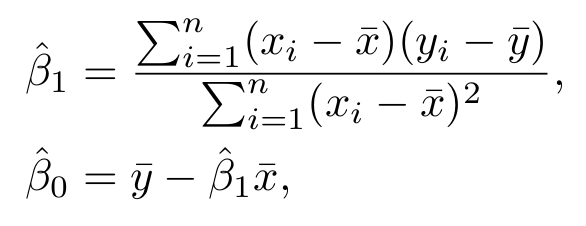
* Least square formula for multiple linear regression is 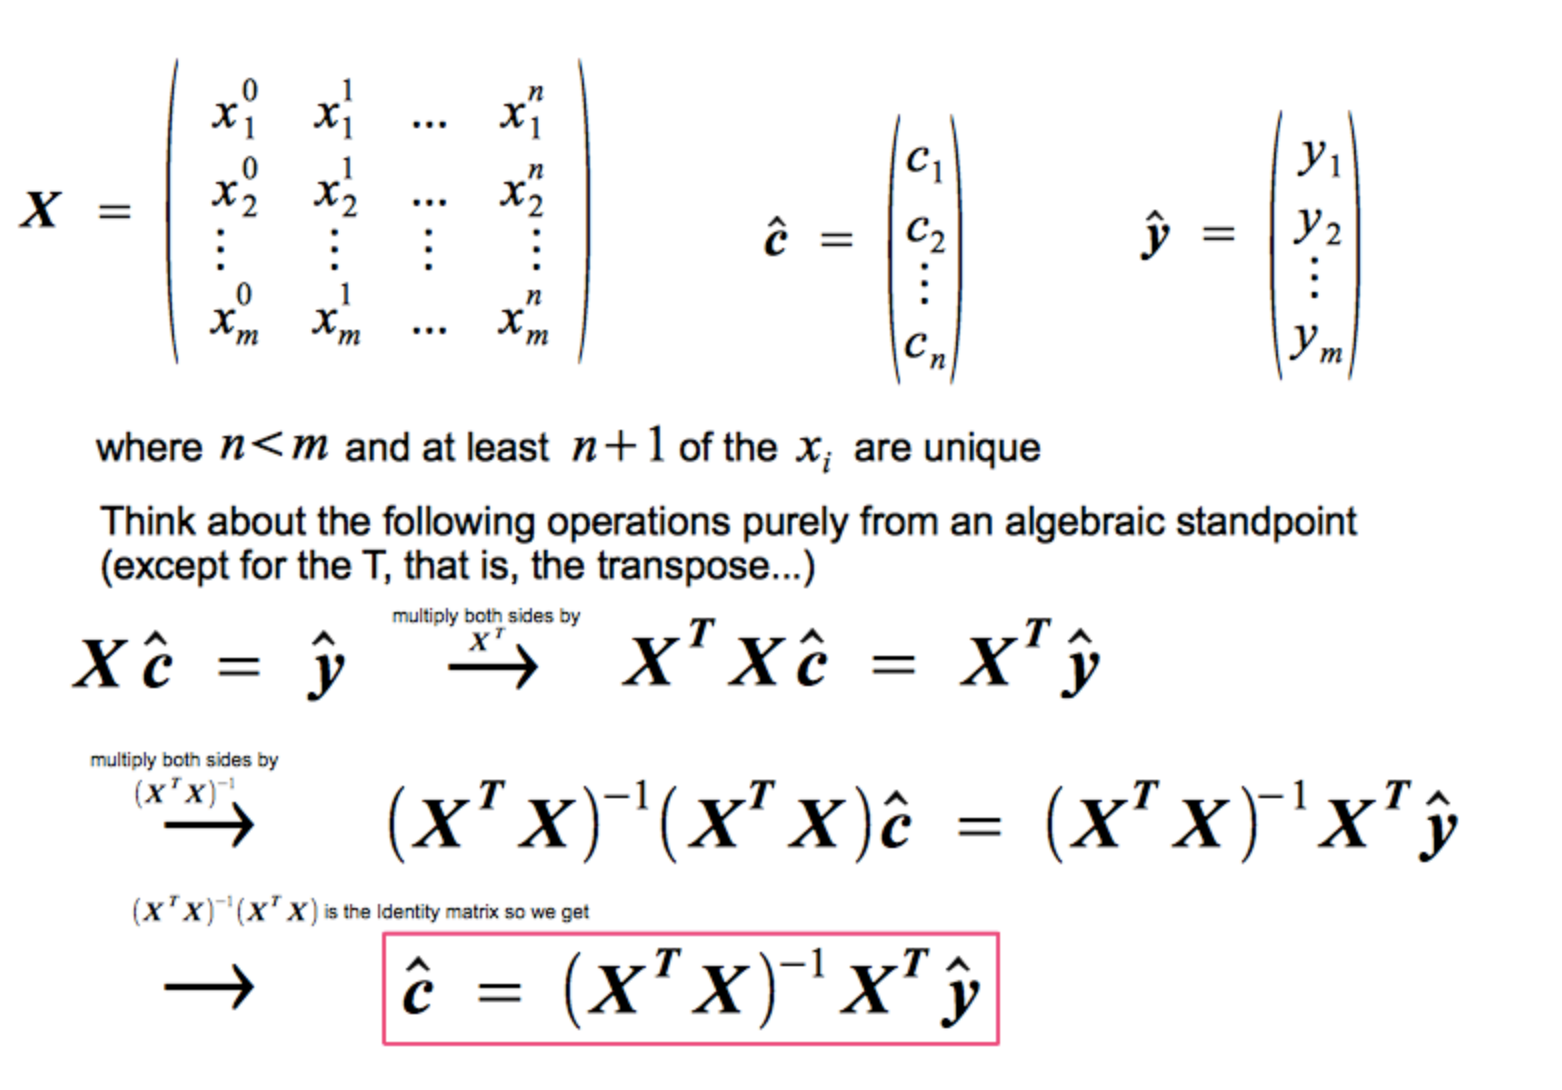

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

from sklearn import datasets
from sklearn.linear_model import LinearRegression

In [ ]:
# Download the dataset
!wget https://raw.githubusercontent.com/krishnaik06/simple-Linear-Regression/master/Salary_Data.csv

--2022-07-13 10:07:35--  https://raw.githubusercontent.com/krishnaik06/simple-Linear-Regression/master/Salary_Data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 454 [text/plain]
Saving to: ‘Salary_Data.csv.3’

Salary_Data.csv.3   100%[===================>]     454  --.-KB/s    in 0s      

2022-07-13 10:07:35 (18.6 MB/s) - ‘Salary_Data.csv.3’ saved [454/454]



In [ ]:
salary_df = pd.read_csv('/content/Salary_Data.csv')
salary_df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


# About the dataset
* As evident from the above output, it is a very simple dataset which predicts salary of an individual given the number of years of experience.
* Since salary is a real valued output, it is a regression problem and hence linear regression can be used to solve it.

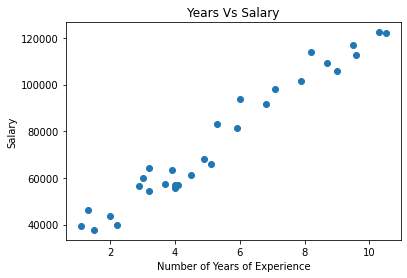

In [ ]:
plt.scatter(x=salary_df['YearsExperience'], y=salary_df['Salary'])
plt.xlabel("Number of Years of Experience")
plt.ylabel("Salary")
plt.title("Years Vs Salary")
plt.show()

# Cost Function
*  Here, we will be using mean squared error as the cost function.
* Its formula is 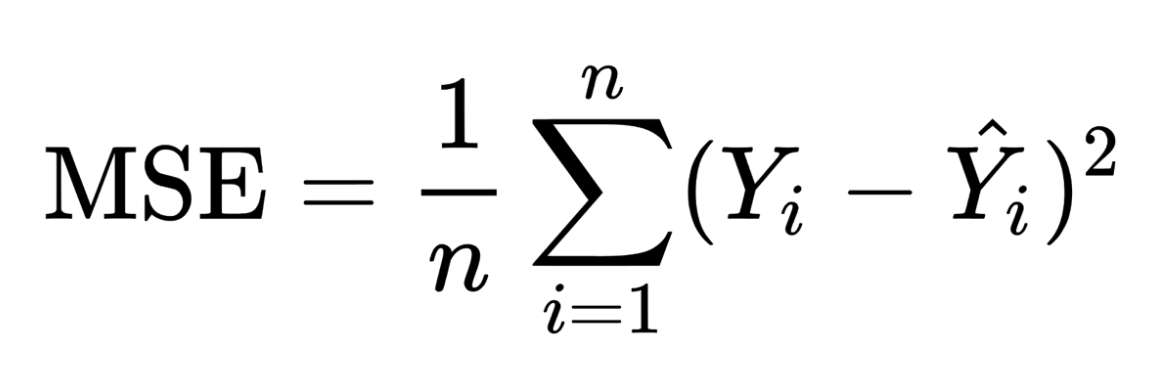
* Here, Y = actual output and Yhat = Predicted output
* There are many other formulas as well including Mean Absolute Error (MAE) but this is the most commonly used metric for performance in regression problem.
  * It has certain advantages, Gradient Descent can be used easily and it accounts for the variations in model as well as the dataset.

In [ ]:
# Directly using the formula
meanx = np.mean(salary_df['YearsExperience'])
meany = np.mean(salary_df['Salary'])
beta1 = np.sum((salary_df['YearsExperience'] - meanx) * (salary_df['Salary'] - meany)) / np.sum((salary_df['YearsExperience'] - meanx)**2)
beta0 = meany - beta1 * meanx

print(beta0, beta1)

25792.20019866869 9449.962321455077


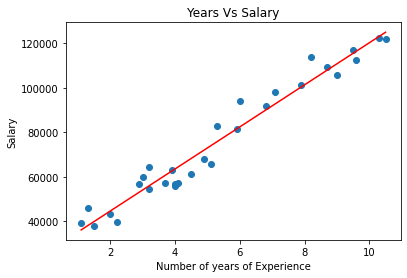

In [ ]:
# Plot final result
plt.scatter(x=salary_df['YearsExperience'], y=salary_df['Salary'])
plt.xlabel("Number of years of Experience")
plt.ylabel("Salary")
plt.title('Years Vs Salary')

yhat = beta0 + beta1*salary_df['YearsExperience']
plt.plot(salary_df['YearsExperience'], yhat, 'r')
plt.show()

# Important Points
* Standardization will not affect the output of simple or multiple linear regression untill regularization is not involved.
* This is because, regularization will greatly influence the higher weights and neglect lower ones.
* Primary assumption of linear regression are
  * Observations are independent of each other.
  * The relations between independent and dependent variables are linear.
  * Residuals should follow a normal distribution (i.e error should be normally distributed)
  * No or little multicollinearity
    * This means no or little multicollinearity between independent variables but strong collinearity between dependent and independent variables.
* **Curse of Dimensionality does not affect linear regression because the number of features does not increase exponentially.**